# Linear congruence method
**Date:**   
16/10/2023  
**Authors:**  
- Ojeda Contreras Braulio Melquisedec  
- Suárez Pérez Juan Pablo

El método produce una secuencia de enteros entre 0 y m-1 de acuerdo a:  
$$X_{i+1}=(a * X_{i} + c) \hspace{0.10cm} mod \hspace{0.10cm} m$$  
$$i=0,1,2,...$$
Donde se tienen los siguientes valores:  
$X_0$: Semilla  
$a$: Multiplicador constante.  
$c$: Incremento.  
$m$: Módulo.  
El número aleatorio se encuetra de la siguiente manera:
$$R = \frac{X}{m}$$

In [6]:
# Import libraries needed.
from simulation.generators import congruence_method as c_m

In [2]:
# Initial parameters.
seed = 87 
a = 1664525
c = 1013904223
m = 100

In [3]:
# Definición del método de Congruencia Lineal.
def congruence_method(seed, a, c, m, n, normalized = True):
    """
        Función Generadora de pseudonúmeros aleatorios 
        por el método de Congruencia Lineal. 
        Entrada: seed, a, c, m, n, normalized.
        Salida: random_list
    """
    
    # Inicialización de pseudonúmeros aleatorios.
    random_list = list()
    
    # Iteración de n números.
    for _ in range(n):
        # Congruencia Lineal.
        x_i = (a * seed + c) % m
        random_value = x_i
        # Normalización.
        if normalized:
            random_value = random_value / m
        # Anexión de valores a lista de pseudonúmeros aleatorios.
        random_list.append(random_value)
        # Remplazo de semilla.
        seed = x_i
    
    # Retorno de lista de pseudonúmeros aleatorios.
    return random_list

In [4]:
# Implementación con normalización, con 10 muestras.
random_list = congruence_method(seed, a, c, m, 10)
print(random_list)

[0.98, 0.73, 0.48, 0.23, 0.98, 0.73, 0.48, 0.23, 0.98, 0.73]


In [5]:
# Implementación sin normalización.
random_list = congruence_method(seed, a, c, m, 10, False)
print(random_list)

[98, 73, 48, 23, 98, 73, 48, 23, 98, 73]


In [9]:
random_list = c_m(seed, a, c, m, 10, False)

In [10]:
random_list

[98, 73, 48, 23, 98, 73, 48, 23, 98, 73]

In [5]:
# Identificación  de patrones
def pattern_identifier(random_list, num_consider = 2):
    """
        Identificador de patrones en lista de pseudonúmeros aleatorios. 
        Entrada: random_list, num_consider
        Salida: pos
    """
    # Obtenemos el patron.
    pattern = random_list[:num_consider]
    # Inicializamos el valor de posición. 
    pos = 0
    # Buscamos patrón.
    for i in range(num_consider, len(random_list)):
        temporal = [random_list[i + j] for j in range(num_consider)]
        if temporal == pattern:
            pos = i
            break
    return pos

In [6]:
# Guardamos la información en un archivo TXT
def save_information(method, values, pos, n):
    with open(method + '.txt', 'a') as file:
        file.write(f"Parámetros de entrada: {values}, Muestro: {n}, Posición de repetición: {pos}\n")

In [9]:
# Implementación sin normalización con 1000.
random_list = congruence_method(seed, a, c, m, 12, False)
pos = pattern_identifier(random_list)
save_information("Congruencias_lineales", [seed, a, c, m], pos, 12)

Text(0.5, 1.0, 'Histograma de Números Pseudoaleatorios')

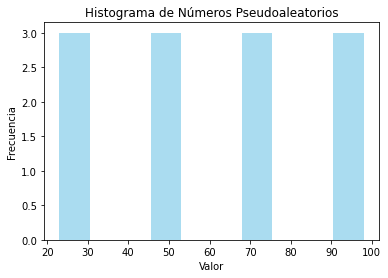

In [10]:
import matplotlib.pyplot as plt

# Crea un histograma
plt.hist(random_list, bins=10, color='skyblue', alpha=0.7)

# Agrega etiquetas y título al gráfico
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Números Pseudoaleatorios')